<a href="https://colab.research.google.com/github/subodha1980/BU/blob/master/activityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificaill Inteligence Assignment

Department of Computing and Informatics,
Faculty of Science and Technology,
Bournemouth University.

## 1. Introduction

    

Physical activity recognition is an integral part of athlete workload management in professional sports and patient management related to ilnesses such as chronic kidney deceases. This work is focussed on physical activity detection of individuals using the sensory data obtained from wearable sensors.

## 2. Problem Definition








Physical activity recognition requires to distinguish different physical movements carried out by the individuals such as walking, running, cycling, etc. This requires accurate prediction of physical movements using sensory data such as videos, accelerometer readings, and heart rate measurements. We have obtained accellerometer readings from five wearable sensors placed in wrists, anckles and chest of athletes as shown in Figure 1. It is required to analyze the data to accurately predict the actual activities carried out by the individuals while wearing the sensors.



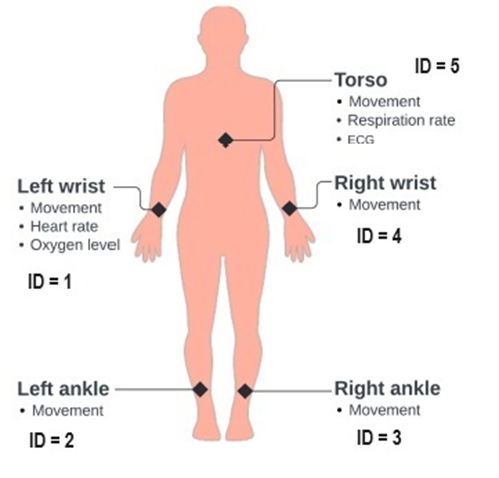

                            Figure 1




We hypothesize that machine learning models can accurately predict the activities carried out by athletes, including running, walking, and exercising. Further, the model will be able to identify the out of distribution (OOD) data samples such as cycling

##3. Objectives



Aim:
Our aim is to accurately predict athlete activities using accelerometer readings obtained by wearable sensors


Objectives:
1.  Study supervised learning techniques and chose ML algorithms that can be used for activity recognition
2.	Predicting the class of an activity given the accelerometer readings of a particular point of time
3.	Identify the most significant sensor position or combination of sensor positions in activity recognition.
4.	Use a ML model to predict the class of the activity given the accelerometer readings of a particular time duration.


## 4. Description of Data

Each accellerometer reading consist of data from three different axises making it fifteen different axises for five sensors. Sensor readings are denoted by X_i, Y_i, Z_i, where i ∈ {1,2,3,4,5} denotes the sensor ID as given in Figre 1.Data is obtained for six activities namely, walking, running, Push-ups, Squats,Cycling, and playing Table tennis. One .csv file is created for each each activity. Howevr, the number of readings obtained each activity is not the same.

##5. Analysis

Data is read from the .csv files and analysed after cleaning and preprocessing.

###5.1. Load Libraries

Mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the required python libraries for general data manipulation and data analysis using machine learning.

In [3]:
# Load Libraries
#Libraries for data manipulation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Libraries for data manipulation
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler

#Libraries for validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
#from sklearn.model_selection import cross_validate
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#Libraries for Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#Utility libraries
import time
from scipy import interpolate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#tensorflow libruaries
#!pip install tensorflow
#!pip install scikit-learn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



Ignore warnings

In [4]:
import warnings

warnings.filterwarnings('ignore')

###5.2. Read data files

Data files can be stored in the local folder or the local google drive. If the file is not locally found, the program will search for the file in specified remote google drive.

####5.2.1 Define file names

In [5]:
import os

cycling = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv"
cycling_1 = "Cycling.csv"
cycling_2 ="https://drive.google.com/file/d/1pjVqvGlm_TPEb8x2ZyDkY17LShmCoBvG/view?usp=drive_link"
pushup = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv"
pushup_1 = "Pushup.csv"
pushup_2 = "https://drive.google.com/file/d/1yF2hqwdfTpDvpUhDDlaA0QOKIN0GG8CI/view?usp=drive_link"
run = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Run.csv"
run_1 = "Run.csv"
run_2 = "https://drive.google.com/file/d/1ortW7OL4gmOvIT40RDa0lgrd1Sg6c7NI/view?usp=drive_link"
squat= "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Squat.csv"
squat_1 = "Squat.csv"
squat_2 = "https://drive.google.com/file/d/1qFXds2VnypOw8aq5SM0VhaQiajF0RZSR/view?usp=drive_link"
tennis = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Table Tennis.csv"
tennis_1 = "Table Tennis.csv"
tennis_2 = "https://drive.google.com/file/d/1N6-PTB5XqsiVLGjVulX1abzJRSXnchuY/view?usp=drive_link"
walk = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Walk.csv"
walk_1 = "Walk.csv"
walk_2 = "https://drive.google.com/file/d/1CavHOnkKbsls_GtnSUMp6Knju3W1a3Hi/view?usp=drive_link"

activityList = ['cycling','pushup','run','squat','tennis','walk']
fileNames = [[cycling,cycling_1,cycling_2],
            [pushup,pushup_1,pushup_2],
             [run,run_1,run_2],
             [squat,squat_1,squat_2],
             [tennis,tennis_1,tennis_2],
             [walk,walk_1,walk_2]]
names = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5','Activity']

####5.2.2 Open files

In [6]:
raw_data = [] # List to store data

# Function to get the file name (check the local google drive and local folder)
def get_file_name(name, name1_1):
  if os.path.exists(name):
      return name
  elif os.path.exists(name1_1):
      return name1_1
  else:
      raise FileNotFoundError(f"File does not exist in local google drive...Reading from the shared google drive ...")

# Read data from all six activities
# Get the file name from local google drive, it not get it from shared google drive
# Open the file, read data, and append data to to data[] list
for index in range(0,6):
  try:
      path = get_file_name(fileNames[index][0],fileNames[index][1])
      print("\n====== Path: ",path)
  except FileNotFoundError as e:
      print(e)
      path = fileNames[index][2]

  try:
      raw_data.append(pd.read_csv(path,names=names,skiprows=1))
      print("File successfully read....")
      print("\n --Head--")
      print(raw_data[index].head(2))
      print("\n --Tail--")
      print(raw_data[index].tail(2))
  except Exception as e:
      # Handle the error if reading the CSV file fails
      print("Error reading file:", e)



====== Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv
File successfully read....

 --Head--
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

  Activity  
0    Cycle  
1    Cycle  

 --Tail--
        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
52444  430  504  458  613  543  536  361  562  538  526  488  417  515  379   
52445  373  457  452  608  538  541  324  542  553  587  478  394  517  366   

        Z5 Activity  
52444  527    Cycle  
52445  529    Cycle  

====== Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv
File successfully read....

 --Head--
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  

*   It seems like there are NULL values

####5.2.3 Visualuze data

We need to combine the datasets for analysis. However, before combining we have to identify the size of data points (instances) and the type of data in each column (feature).

##### 5.2.3.1 View size of data sets

In [7]:
for activity, df in zip(activityList, raw_data):
    print(f"{activity}: {df.shape}")
    print(df.info())
    print('\n')

cycling: (52446, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52446 entries, 0 to 52445
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   X1        52446 non-null  int64 
 1   Y1        52446 non-null  int64 
 2   Z1        52446 non-null  int64 
 3   X2        52446 non-null  int64 
 4   Y2        52446 non-null  int64 
 5   Z2        52446 non-null  int64 
 6   X3        52446 non-null  int64 
 7   Y3        52446 non-null  int64 
 8   Z3        52446 non-null  int64 
 9   X4        52446 non-null  int64 
 10  Y4        52446 non-null  int64 
 11  Z4        52446 non-null  int64 
 12  X5        52446 non-null  int64 
 13  Y5        52446 non-null  int64 
 14  Z5        52446 non-null  int64 
 15  Activity  52446 non-null  object
dtypes: int64(15), object(1)
memory usage: 6.4+ MB
None


pushup: (6844, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 16 columns):
 #

In [8]:
# check the shape of six data sets
index = 0
for df in raw_data:
  print(activityList[index],':',df.shape)
  print(raw_data[index].info())
  index = index  + 1
  print('\n')

cycling : (52446, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52446 entries, 0 to 52445
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   X1        52446 non-null  int64 
 1   Y1        52446 non-null  int64 
 2   Z1        52446 non-null  int64 
 3   X2        52446 non-null  int64 
 4   Y2        52446 non-null  int64 
 5   Z2        52446 non-null  int64 
 6   X3        52446 non-null  int64 
 7   Y3        52446 non-null  int64 
 8   Z3        52446 non-null  int64 
 9   X4        52446 non-null  int64 
 10  Y4        52446 non-null  int64 
 11  Z4        52446 non-null  int64 
 12  X5        52446 non-null  int64 
 13  Y5        52446 non-null  int64 
 14  Z5        52446 non-null  int64 
 15  Activity  52446 non-null  object
dtypes: int64(15), object(1)
memory usage: 6.4+ MB
None


pushup : (6844, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 16 columns):


We have to check the labels for consistency

##### 5.2.3.2 Check label consistency

In [9]:
for df in raw_data:
  print('\n-----------------')
  print(df['Activity'].unique())


-----------------
['Cycle']

-----------------
['Pushup']

-----------------
['Run']

-----------------
['Squat' nan]

-----------------
['Table Tenis']

-----------------
['Walk']


*   There are NULL values in labels as well


**We have to consider the following in our data preperation.**



1.   For predicting the class of an activity given the accelerometer readings of a particular point of time (Objective 2), each data point is one instance of data for ML model. Hence, we can remove NULL rows and drop the rows as required. Therefore, we combine the data and start cleaning.

2.   In order to predict the class of the activity given the accelerometer readings of a particular time duration (Objective 4), number of rows (data points) creates one instance of data for the ML model. Here, we can't just remove a row or drop a row of data.  


###5.3 predicting the class of an activity given the accelerometer readings of a particular point of time

#### 5.3.1 Combine Datasets


In [10]:
# Prepare the 'dataset' by concatinating individual datasets
dataset = pd.concat(raw_data, ignore_index=True)
# Shape of the combined dataset
print("Shape of combined dataset:", dataset.shape)
print('\nSummary of Data:\n')
print(dataset.groupby('Activity').size())

Shape of combined dataset: (171724, 16)

Summary of Data:

Activity
Cycle          52446
Pushup          6844
Run             9987
Squat          12229
Table Tenis    67699
Walk           20300
dtype: int64


####5.3.2 Clean Data

#####5.3.2.1 Remove Nulls

##### Check for Null values

In [11]:
data = dataset.copy()
print(data.isna().sum())

X1          2220
Y1          2220
Z1          2220
X2          2220
Y2          2220
Z2          2220
X3          2220
Y3          2220
Z3          2220
X4          2220
Y4          2220
Z4          2220
X5          2220
Y5          2220
Z5          2220
Activity    2219
dtype: int64


There are NULL values among features and labels.  They have to be removed

##### Remove Null values and check again

In [12]:
data.dropna(inplace=True)
print(data.isna().sum())

print("\nShape of data after removing NULLs:", data.shape)

X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64

Shape of data after removing NULLs: (169504, 16)



*   It can be observed that all the NULL values are removed



#####5.3.2.2 Remove duplicates

In [13]:
dups = data.duplicated()
print("Number of duplicates removed:", dups.sum())
data = data[~dups]

print("\nShape of data after removing NULLs:", data.shape)

Number of duplicates removed: 85

Shape of data after removing NULLs: (169419, 16)


####5.3.3 Pre-process the data

##### 5.3.3.1 Encode the labels

In [14]:
labelEncodedData = data.copy()
# Encode the Activity column
LE = LabelEncoder()
labelEncodedData['Activity'] = LE.fit_transform(labelEncodedData['Activity'])
print(LE.classes_)
print(LE.transform(['Cycle', 'Pushup', 'Run', 'Squat', 'Table Tenis', 'Walk']))

['Cycle' 'Pushup' 'Run' 'Squat' 'Table Tenis' 'Walk']
[0 1 2 3 4 5]


##### 5.3.3.2 View the distribution of feature values

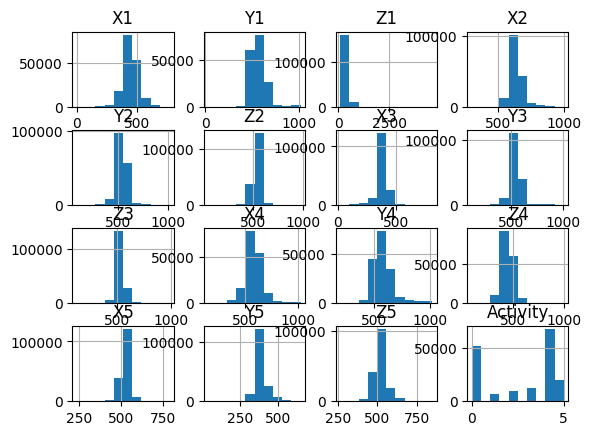

In [15]:
labelEncodedData.hist()
plt.show()

*   Number of instances per label is imbalanced. We have to balance the dataset
*   Class labels are in 'object' format. We have to encode them to labels
*   Feature values are ecentered around 500, We can scale them to the same range between 0 and 1






##### 5.3.3.3 Identify the correlations between features as well as the labels

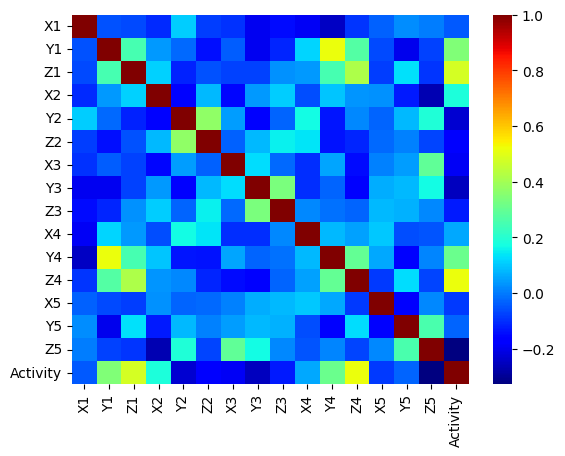

In [16]:
matrix = matrix = labelEncodedData.corr()
sns.heatmap(matrix,cmap="jet")
plt.show()

It cna be observed that Y1, Z1,Y4,Z4 are correlated with the Activity than the rest of the features. Hence, we can predict the Sensor 1 and Sensor 4 would be contributing to the classification than the other sensors

##### 5.3.3.4 Scale the features

Scale the features. We can do this at the pipeline as well. However, if it is carrried out at the pipeline, cross validation and hyper parameter optimization will recursively carryout the feature scalling.

In [17]:
feature_cols = labelEncodedData.columns[:-1]  # Exclude the last column (label)

ms = MinMaxScaler()
# Preview the data set
print('\nRandom under sampled data: Before scaling')
print(labelEncodedData.head(2))

print('\n-----------------------------------------------')

X_scaled = ms.fit_transform(labelEncodedData[feature_cols])
X_s = pd.DataFrame(X_scaled, columns=feature_cols)
Y_s = labelEncodedData['Activity']

print('\nRandom under sampled data: After scaling')
print(X_s.head(2))


Random under sampled data: Before scaling
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  375.0  593.0  378.0  535.0  434.0  424.0  317.0  412.0  437.0  561.0   
1  438.0  593.0  381.0  609.0  494.0  482.0  361.0  472.0  496.0  623.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  529.0  379.0  444.0  320.0  429.0         0  
1  596.0  395.0  505.0  360.0  488.0         0  

-----------------------------------------------

Random under sampled data: After scaling
         X1        Y1        Z1        X2        Y2        Z2        X3  \
0  0.488918  0.565041  0.063901  0.338549  0.375000  0.401532  0.372327   
1  0.571056  0.565041  0.064566  0.443812  0.439655  0.464989  0.427673   

         Y3        Z3        X4        Y4        Z4        X5        Y5  \
0  0.333704  0.361079  0.470656  0.400731  0.320569  0.377737  0.455150   
1  0.400445  0.430246  0.542002  0.482339  0.338074  0.489051  0.521595   

         Z5  
0  0.282759  
1  0.384483  

##### 5.3.3.5 Balance the data set
In order to balance the dataset we can either under sample or over sample. Since there is a huge variation in the lowest and the highest number of data points(instances), training and testing data selection can be biased if we over sample. This may lead to over fitting or under fitting.


Therefore, as the first choice, we will select under sampling the data.
As we have seen before, 'Pushup' has least amount of data we will random under sample the to the size of the 'Pushup' data set.



In [19]:
X = X_s.values #(processedData.drop(columns=['Activity'])).values
Y = Y_s.values #processedData['Activity'].values

#labelCounts = dataset['Activity'].value_counts()
#print(labelCounts)

print("Class distribution before under-sampling:")
print(dataset.groupby('Activity').size())

# Perform random under-sampling
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
x_resampled, y_resampled = rus.fit_resample(X, Y)

# Check the class distribution after under-sampling
print("\nClass distribution after under-sampling:")
encodedLabels, counts = np.unique(y_resampled, return_counts=True)

for value, count in zip(encodedLabels, counts):
    print(f"Encoded Label: {value}, Count: {count}")

Class distribution before under-sampling:
Activity
Cycle          52446
Pushup          6844
Run             9987
Squat          12229
Table Tenis    67699
Walk           20300
dtype: int64

Class distribution after under-sampling:
Encoded Label: 0, Count: 6843
Encoded Label: 1, Count: 6843
Encoded Label: 2, Count: 6843
Encoded Label: 3, Count: 6843
Encoded Label: 4, Count: 6843
Encoded Label: 5, Count: 6843


#### 5.3.4 Build the model

#####5.3.4.1 Split data into training and testing data

In [24]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state=1)

#####5.3.4.2 Setup a pipeline and compare models

###### List the selected models

In [22]:
models = []
models.append(('LR',LogisticRegression(solver='saga', multi_class='multinomial', C=1.0, penalty='l2', class_weight=None, max_iter=1000)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('CART',DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='best')))

###### Setup the pipeline

Here, we cross validate the models.

We can consider dimentionality reduction if there is no significant performance is not degradation and if it gains a significant advantage in processing time.

We will compare the performance of having 4, 6, 8, and 10 dimentions.

***This compariton takes longer time to execute. Hence, try the next cell which contains only a selected dimention ***



================ No of Dimensions = 4 ===================


================ No of Dimensions = 6 ===================


================ No of Dimensions = 8 ===================


================ No of Dimensions = 10 ===================


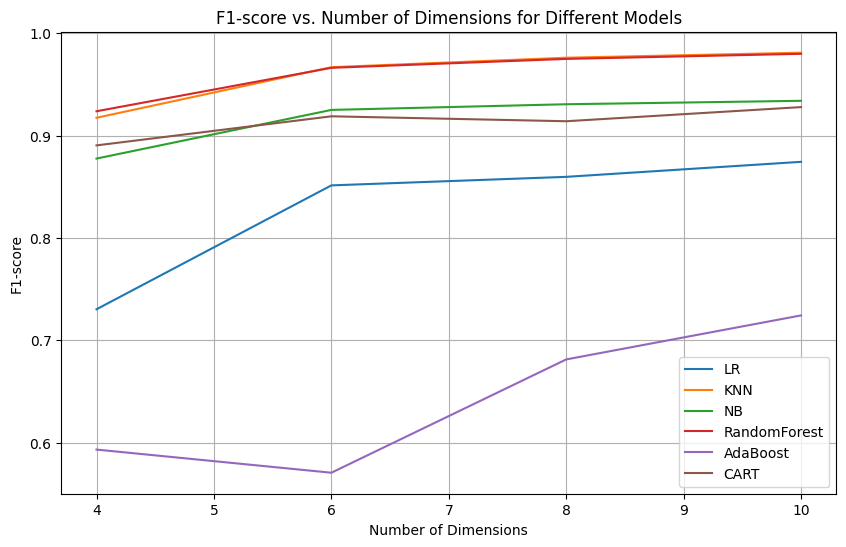

In [30]:
def crossValidateModels(dimensions_list):
    f1_scores = {modelName: [] for modelName, _ in models}
    for NoofDimensions in dimensions_list:
        print("\n\n================ No of Dimensions = {} ===================".format(NoofDimensions))
        for modelName, model in models:
            pipe = make_pipeline(PCA(n_components=NoofDimensions), model)
            results = cross_validate(estimator=pipe, X=X_train, y=Y_train, cv=10, n_jobs=1, scoring='f1_macro', return_train_score=True)
            f1_score_mean = results['test_score'].mean()
            f1_scores[modelName].append(f1_score_mean)

    return f1_scores

dimensionsList = [4, 6, 8, 10]
f1_scores = crossValidateModels(dimensionsList)

#  f1-scores against the principle components
plt.figure(figsize=(10, 6))
for modelName, scores in f1_scores.items():
    plt.plot(dimensionsList, scores, label=modelName)

plt.xlabel('Number of Dimensions')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Dimensions for Different Models')
plt.legend()
plt.grid(True)
plt.show()



In [31]:
def crossValidateModels(NoofDimentions):
  print("\n\n================ No of Dimentions = {} ===================".format(NoofDimentions))
  for modelName, model in models:

      # We apply dimentiomality reduction by PCA and number of principal components as NoofDimentions
      #pipe = make_pipeline(StandardScaler(), PCA(n_components=NoofDimentions),model)
      start_time = time.time()
      pipe = make_pipeline(PCA(n_components=NoofDimentions),model)
      results = cross_validate(estimator=pipe, X=X_train, y=Y_train, cv=10, n_jobs=1, scoring=['accuracy', 'f1_macro'], return_train_score=True)
      end_time = time.time()
      #print(f'CV accuracy scores: {scores}')
      #print(f'CV accuracy: {np.mean(scores):.3f} '
      #      f'+/- {np.std(scores):.3f}')

      print(modelName + ":")
      print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: (mean) ', results['test_accuracy'].mean(),'std',results['test_accuracy'].std())
      print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: (mean) ', results['test_f1_macro'].mean(),'std',results['test_f1_macro'].std())
      print("Executing time: ", end_time-start_time)
      print("---------------------------------------------------------")

crossValidateModels(6)



================ No of Dimentions = 6 ===================
LR:
Accuracy: train:  0.8547463920317815 | test: (mean)  0.8545333029290114 std 0.005264501656296254
F1-score: train:  0.8517570848906766 | test: (mean)  0.8515108424754125 std 0.005265777815742741
Executing time:  4.754425525665283
---------------------------------------------------------
KNN:
Accuracy: train:  0.9754680118345733 | test: (mean)  0.9669367738419012 std 0.0030342831112354467
F1-score: train:  0.9754523961667807 | test: (mean)  0.966898598191046 std 0.0030231357821461336
Executing time:  34.20318937301636
---------------------------------------------------------
NB:
Accuracy: train:  0.9250407659598252 | test: (mean)  0.925165990912074 std 0.0022714638770262403
F1-score: train:  0.9250320068667911 | test: (mean)  0.9251546416847966 std 0.002303234964590476
Executing time:  2.5916833877563477
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999898516079538 | test: (mean

*   KNN and Random Forest classifiers ourperforms the other models by quite a margin.
*   Improvement of F1-scores are not significant after 6 dimensions.
*   Threrefore we select 6 dimensions
*   Though KNN is less suitable than Random Forest classifier for large data sets, the execution time for KNN is almost 25% of that of the Random Forest.
*   Hence, we select the KNN model

#####5.3.4.3 Hyper-parameter tuning

In [57]:
# Function to plot the confuction matrix
def plotConfMatrix(conf_matrix):
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Parameter grid for Random Forest model
# for hyper parameter optimization using Grid Search method
paramGridRF = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

paramGridRF_pipe = {
    'randomforestclassifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
#---------------------
# Parameter grid for RKNN model
# for hyper parameter optimization using Grid Search method
paramGridKNN = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute nearest neighbors
}

paramGridKNN_pipe = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'kneighborsclassifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'kneighborsclassifier__p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute nearest neighbors
}

#------------This is to test the program ------#
paramGridTestKNN = {
    'n_neighbors': [3],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'p': [1],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
    'algorithm': ['auto']  # Algorithm used to compute nearest neighbors
}

paramGridTestKNN_pipe = {
    'kneighborsclassifier__n_neighbors': [3,5],  # Number of neighbors to consider
    'kneighborsclassifier__weights': ['uniform'],  # Weight function used in prediction
    'kneighborsclassifier__p': [1],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
    'kneighborsclassifier__algorithm': ['auto']  # Algorithm used to compute nearest neighbors
}

In [53]:
def runModelOpt(model, x_in, y_in, split, param_grid):
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x_in, y_in, test_size=split, random_state=42)

    # Perform grid search cross-validation
    pipe = make_pipeline(StandardScaler(), PCA(n_components=10),model)
    grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(Xf_train, Yf_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # Use the best model obtained from grid search
    bestFittedModel = grid_search.best_estimator_

    # Train your model on the entire training set (without cross-validation)
    startTime = time.time()
    bestFittedModel.fit(Xf_train, Yf_train)
    endTime = time.time()

    print('Time to Train:', endTime - startTime, 'Sec')

    # Make predictions on the test set
    startTime = time.time()
    Yf_pred = bestFittedModel.predict(Xf_test)
    endTime = time.time()

    print('Time to Test:', endTime - startTime, 'Sec')

    # Compute and print the confusion matrix
    plotConfMatrix(confusion_matrix(Yf_test, Yf_pred))

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(Yf_test, Yf_pred)
    f1 = f1_score(Yf_test, Yf_pred, average='weighted')  # You can choose 'macro' or 'micro' as well

    print('Accuracy:', accuracy)
    print('F1-score:', f1)

    # Compute classification report
    report = classification_report(Yf_test, Yf_pred)

    print('\nClassification Report')
    print('-----------------------')
    # Print classification report
    print(report)
    return bestFittedModel, best_params

In [27]:
# Testing
#optimizedFittedKNN, optimalParamKNN = runModelOpt(KNeighborsClassifier(), x_resampled, y_resampled, 0.2, paramGridTestKNN_pipe)

==============Hyper parameter Optimization for RF ===============
Best Parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 300}
Best Score: 0.9795408904839459
Time to Train: 44.325440645217896 Sec
Time to Test: 0.4419879913330078 Sec


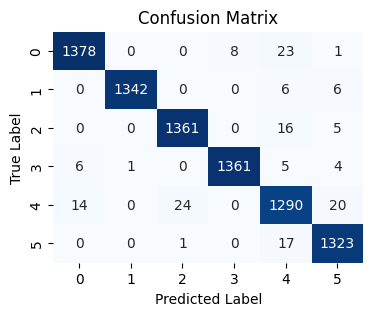

Accuracy: 0.9808816366293229
F1-score: 0.980911909796309

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1410
           1       1.00      0.99      1.00      1354
           2       0.98      0.98      0.98      1382
           3       0.99      0.99      0.99      1377
           4       0.95      0.96      0.95      1348
           5       0.97      0.99      0.98      1341

    accuracy                           0.98      8212
   macro avg       0.98      0.98      0.98      8212
weighted avg       0.98      0.98      0.98      8212



In [26]:
print('==============Hyper parameter Optimization for RF ===============')
optimizedFittedRF, optimalParamRF = runModelOpt(RandomForestClassifier(), x_resampled, y_resampled, 0.2, paramGridRF_pipe)



==============Hyper parameter Optimization for KNN ===============
Best Parameters: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Best Score: 0.9825549088669556
Time to Train: 0.4723358154296875 Sec
Time to Test: 0.9966630935668945 Sec


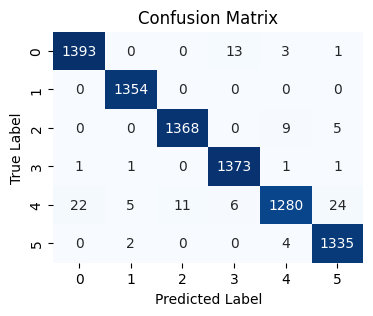

Accuracy: 0.986726741354116
F1-score: 0.986660294976101

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1410
           1       0.99      1.00      1.00      1354
           2       0.99      0.99      0.99      1382
           3       0.99      1.00      0.99      1377
           4       0.99      0.95      0.97      1348
           5       0.98      1.00      0.99      1341

    accuracy                           0.99      8212
   macro avg       0.99      0.99      0.99      8212
weighted avg       0.99      0.99      0.99      8212



In [54]:
print('\n\n==============Hyper parameter Optimization for KNN ===============')
optimizedFittedKNN, optimalParamKNN = runModelOpt(KNeighborsClassifier(), x_resampled, y_resampled, 0.2, paramGridKNN_pipe)

#####5.3.4.4 Select the Model

Based on the rerults of the hyper parameter tuning, KNN models outperforms the Random Forest model. Hence, we select the KNN model.

We will now test for convergence

#####5.3.4.5 Test for convergence

In [42]:
optimalParamRF = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
optimalParamKNN = { 'n_neighbors': 3, 'weights': 'distance' , 'p': 2 , 'algorithm': 'auto' }

In [18]:
def convergenceTest(x_in, y_in, split, model):
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x_in, y_in, test_size=split, random_state=42)

    # Perform grid search cross-validation
    pipe = make_pipeline(StandardScaler(), PCA(n_components=10),model)

    train_sizes, train_scores, test_scores = learning_curve(pipe, Xf_train, Yf_train, cv=10, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ylim = None
    plt.figure()
    plt.title('Test for Convergence')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

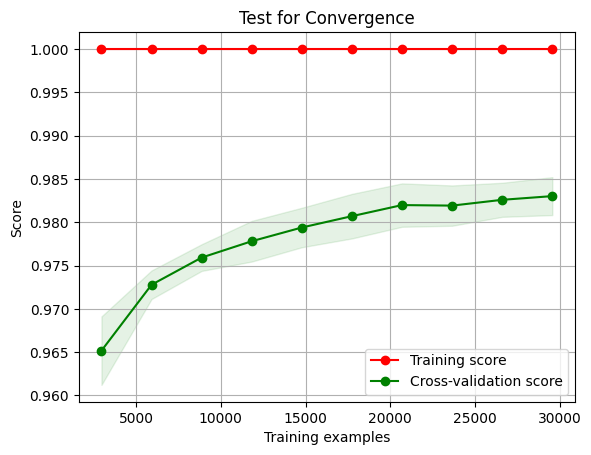

In [54]:
convergenceTest(x_resampled, y_resampled, 0.2, KNeighborsClassifier(**optimalParamKNN))

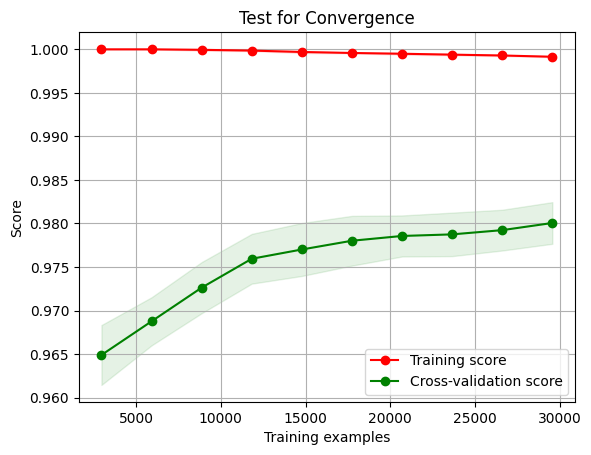

In [53]:
convergenceTest(x_resampled, y_resampled, 0.2, RandomForestClassifier(**optimalParamRF))

In [19]:
from imblearn.over_sampling import RandomOverSampler

X = (processedData.drop(columns=['Activity'])).values
Y = processedData['Activity'].values

#labelCounts = dataset['Activity'].value_counts()
#print(labelCounts)

print("Class distribution before over-sampling:")
print(dataset.groupby('Activity').size())

# Perform random under-sampling
rus = RandomOverSampler(sampling_strategy='all', random_state=42)
x_resampled, y_resampled = rus.fit_resample(X, Y)

# Check the class distribution after under-sampling
print("\nClass distribution after under-sampling:")
encodedLabels, counts = np.unique(y_resampled, return_counts=True)

for value, count in zip(encodedLabels, counts):
    print(f"Encoded Label: {value}, Count: {count}")



Class distribution before over-sampling:
Activity
Cycle          52446
Pushup          6844
Run             9987
Squat          12229
Table Tenis    67699
Walk           20300
dtype: int64

Class distribution after under-sampling:
Encoded Label: 0, Count: 67681
Encoded Label: 1, Count: 67681
Encoded Label: 2, Count: 67681
Encoded Label: 3, Count: 67681
Encoded Label: 4, Count: 67681
Encoded Label: 5, Count: 67681


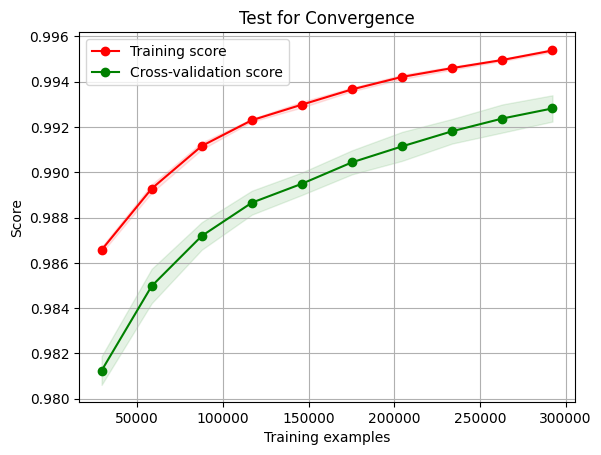

In [56]:
convergenceTest(x_resampled, y_resampled, 0.2, KNeighborsClassifier())

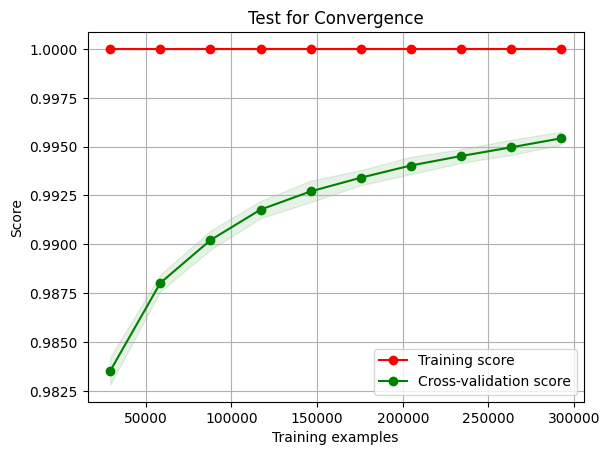

In [20]:
convergenceTest(x_resampled, y_resampled, 0.2, RandomForestClassifier())

#####5.3.4.4 Identify feature significance

In [29]:
def plotFeatureImportance(feat_imp):
  # Features importance plot
  plt.figure(figsize=[20,6])
  sns.barplot(data=feat_imp, x='feature', y='importance')
  plt.title('Features Importance', weight='bold', fontsize=20)
  plt.xlabel('Feature', weight='bold', fontsize=13)
  plt.ylabel('Importance (%)', weight='bold', fontsize=13);


  # add annotations
  impo = feat_imp['importance']
  locs, labels = plt.xticks()

  for loc, label in zip(locs, labels):
      count = impo[loc]
      pct_string = '{:0.2f}%'.format(count)

      plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')


Features Importance:


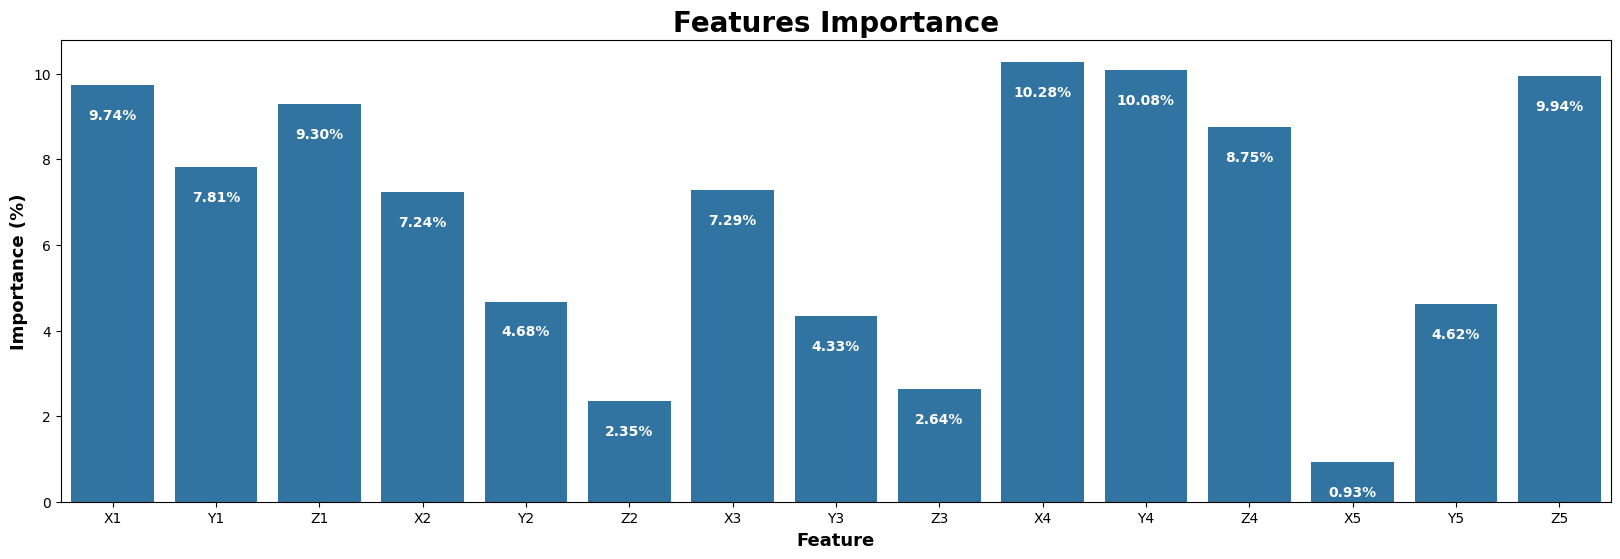

In [32]:
# View a list of the features and their importance scores
def featureImportance(model,x, y, split):

    ms = MinMaxScaler()
    x_scaled = ms.fit_transform(x)
    FeatureColumns = (processedData.drop(columns=['Activity'])).columns.tolist()
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x_scaled, y, test_size=split, random_state=42)

    # fit the momdel
    model.fit(Xf_train, Yf_train)
    print('\nFeatures Importance:')
    feat_imp = pd.DataFrame(zip(FeatureColumns, model.feature_importances_ * 100), columns=['feature', 'importance'])
    plotFeatureImportance(feat_imp)

featureImportance(RandomForestClassifier(**optimalParamRF),x_resampled, y_resampled, 0.2)

---------------

##### 5.3.4.5 Run the model with most significant features

###### Remove the less signiticant features

In [ ]:
xf_resampled = x_resampled.copy()
xf_resampled.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
yf_resampled = y_resampled.copy()

###### Run the model and obtain the evaluation parameters

Time to Train: 19.477710962295532 Sec
Time to Test: 0.30718350410461426 Sec


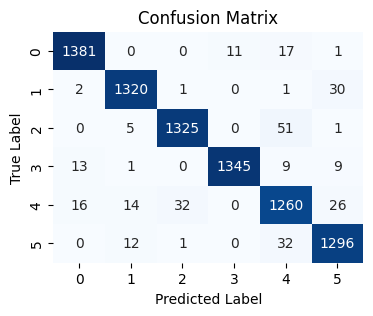

Accuracy: 0.9652946906965416
F1-score: 0.9653807621820447

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1410
           1       0.98      0.97      0.98      1354
           2       0.97      0.96      0.97      1382
           3       0.99      0.98      0.98      1377
           4       0.92      0.93      0.93      1348
           5       0.95      0.97      0.96      1341

    accuracy                           0.97      8212
   macro avg       0.97      0.97      0.97      8212
weighted avg       0.97      0.97      0.97      8212



In [ ]:
runModel(clf, xf_resampled, yf_resampled, 0.2)

###5.4 Model to predict the class of the activity given the accelerometer readings of a particular time duration


So far, we have considered one data sample received from sensors (each line consisting of he 15 features) as one data point. However, in reality, one unit of human activity lasts for a number of samples (a frame). Therefore, we have to consider the following.


1.   Each data frame should contain a number of data points each having same set of features, making it a two dimensional arrray.
2.   The data samples are received in a sequence making it undesirable to rendomly remove samples in between when dropping the null values and during under sampling. hence, we will try to remove the numm values at the end of a data set and apply interpolation to approximate the missing values.
1.   We can't remove the duplicating records as they can be valid information in a data frame.






#### 5.4.1 Check for NULL records

In [14]:
#Check for Null records
for df, activity in zip(raw_data, activityList):
#for df in raw_data:
  #print(activityList[index])
  print(activity)
  print('.................')
  #print(raw_data[index].isna().sum())
  print(df.isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          1
Y1          1
Z1          1
X2          1
Y2          1
Z2          1
X3          1
Y3          1
Z3          1
X4          1
Y4          1
Z4          1
X5          1
Y5          1
Z5          1
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          2219
Y1          2219
Z1          2219
X2          2219
Y2          2219
Z2          2219
X3          2219
Y3          2219
Z3          2219
X4          2219
Y4          2219

#### 5.4.2 Remove NULL records

Remove NULL records at the end and interpolate to replace NULLs in the middle

In [15]:
data_wihtout_NULLs = raw_data.copy()

for dfm in data_wihtout_NULLs:
    # Remove rows with NULL values at the end
    dfm.dropna(axis=0, how='all', inplace=True)

    # Interpolate NULL values in the middle
    for col in dfm.columns:
        # Check if there are NULL values in the middle of the column
        if dfm[col].isnull().any():
            # Interpolate NULL values using linear interpolation
            dfm[col] = dfm[col].interpolate(method='linear')

#for index in range(0,6):
for df, activity in zip(data_wihtout_NULLs, activityList):
  #print(activityList[index])
  print(activity)
  print('.................')
  #print(data_wihtout_NULLs[index].isna().sum())
  print(df.isna().sum())
  print('\n')

  # Display the shape of each dataset after removing Nulls
#for index in range(0,6):
for df, activity in zip(data_wihtout_NULLs, activityList):
  print(activity,':',df.shape)
  #print(activityList[index],':',data_wihtout_NULLs[index].shape)

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

Since the data is impalanced, we need to balance the datasets.


#### 5.4.2 Balancing the data sets

Balancing the datase  has to be done before concatinating the data sets from different activities as it is easier to identify the NULLS at the end and middle of each dataset when they are in separate datasets.

We take two approaches to balance data sets.


1.   Apply under smapling, which would randomly remove certain rows
2.   Truncate the data sets to the size of the samllest



*   While the data from different activities are in different sets, we encode the labels manually.




##### 5.4.2.1 Randomly remove rows of each data set to make them equal in size

In [40]:
dataRandUSampled = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([df.shape[0] for df in data_wihtout_NULLs])
print("Undersampling to size:", smallestSize)
for df in data_wihtout_NULLs:
    # If this dataset is larger than the smallest one, perform undersampling
    if df.shape[0] > smallestSize:
        # Randomly select rows for the dataset
        selectedRows = np.random.choice(df.shape[0], size=smallestSize, replace=False)
        # Keep only the selected rows
        dataRandUSampled.append(df.iloc[selectedRows])
    else:
        dataRandUSampled.append(df)

# Display the shape of each dataset after random undersampling
for df, activity in zip(dataRandUSampled,activityList):
  print(activity,':',df.shape)
print('')
#Each data label set is indexed
for df in dataRandUSampled:
  print(df.head(2))


Undersampling to size: 6844
cycling : (6844, 16)
pushup : (6844, 16)
run : (6844, 16)
squat : (6844, 16)
tennis : (6844, 16)
walk : (6844, 16)

        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
42484  427  516  397  634  527  537  363  554  551  556  496  372  534  397   
43334  492  522  412  651  532  528  382  526  549  536  512  392  527  395   

        Z5 Activity  
42484  540    Cycle  
43334  536    Cycle  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5 Activity  
0  448.0  372.0  451.0  410.0  528.0   Pushup  
1  514.0  420.0  490.0  452.0  584.0   Pushup  
       X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
6426  458  687  457  566  501  519  346  551  614  765  620  529  598  127   
6015  367  777  497  556  

##### 5.4.2.2 Remove the rows at the end of each data set to make them equal in size

In [43]:
dataTruncated = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([data_wihtout_NULLs[index].shape[0] for index in range(6)])
print("Truncating to size:", smallestSize)

for df in data_wihtout_NULLs:
    dataTruncated.append(df.iloc[:smallestSize, :])

# Display the shape of each dataset after random undersampling
for df, activity in zip(dataTruncated,activityList):
  print(activity,':',df.shape)
print('')

#Each data label set is indexed
for df in dataTruncated:
  print(df.head(2))

Truncating to size: 6844
cycling : (6844, 16)
pushup : (6844, 16)
run : (6844, 16)
squat : (6844, 16)
tennis : (6844, 16)
walk : (6844, 16)

    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

  Activity  
0    Cycle  
1    Cycle  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5 Activity  
0  448.0  372.0  451.0  410.0  528.0   Pushup  
1  514.0  420.0  490.0  452.0  584.0   Pushup  
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  328  453  395  581  449  489  319  427  449  528  462  388  431  313  416   
1  373  513  447  622  488  525  363  486  511  6

##### 5.4.2.3 Concatinate data


Concatinate the data sets to start pre-processng

In [44]:
datasetRSAMP = pd.concat(dataRandUSampled, ignore_index=True) # Random under sampled data
datasetTRUNK = pd.concat(dataTruncated, ignore_index=True) # Truncated data
# Shape of the combined dataset
print("Shape of combined random under sampled dataset:", datasetRSAMP.shape)
print(datasetRSAMP.groupby('Activity').size())
print('')
#print(datasetRSAMP.head(2))
#print('')
print("Shape of combined trunkated dataset:", datasetTRUNK.shape)

print(datasetTRUNK.groupby('Activity').size())
#print('')
#print(datasetTRUNK.head(2))

Shape of combined random under sampled dataset: (41064, 16)
Activity
Cycle          6844
Pushup         6844
Run            6844
Squat          6844
Table Tenis    6844
Walk           6844
dtype: int64

Shape of combined trunkated dataset: (41064, 16)
Activity
Cycle          6844
Pushup         6844
Run            6844
Squat          6844
Table Tenis    6844
Walk           6844
dtype: int64


#### 5.4.3 Pre-Process data

Scale the features

In [45]:
#cols_RSAMP = datasetRSAMP.columns
feature_cols = datasetRSAMP.columns[:-1]  # Exclude the last column (label)

ms = MinMaxScaler()
# Preview the data set
print('\nRandom under sampled data: Before scaling')
print(datasetRSAMP.head(2))

print('\n-----------------------------------------------')

X_scaled_RS = ms.fit_transform(datasetRSAMP[feature_cols])
X_s_RS = pd.DataFrame(X_scaled_RS, columns=feature_cols)
Y_RS = datasetRSAMP['Activity']

#X_RSAMP = ms.fit_transform(datasetRSAMP)
#X_RSAMP = pd.DataFrame(X_RSAMP, columns=[cols_RSAMP])
print('\nRandom under sampled data: After scaling')
print(X_s_RS.head(2))

print('\n==============================================')

#cols_TRUNK = datasetTRUNK.columns
feature_cols = datasetRSAMP.columns[:-1]
# Preview the data set
print('\nTrunkated data: Before scaling')
print(datasetTRUNK.head(2))

print('\n-----------------------------------------------')

X_scaled_TR = ms.fit_transform(datasetTRUNK[feature_cols])
X_s_TR = pd.DataFrame(X_scaled_TR, columns=feature_cols)
Y_TR = datasetTRUNK['Activity']
#X_TRUNK = ms.fit_transform(datasetTRUNK)
#X_TRUNK = pd.DataFrame(X_TRUNK, columns=[cols_TRUNK])
print('\nTrunkated data: After scaling')
print(X_s_TR.head(2))


Random under sampled data: Before scaling
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  427.0  516.0  397.0  634.0  527.0  537.0  363.0  554.0  551.0  556.0   
1  492.0  522.0  412.0  651.0  532.0  528.0  382.0  526.0  549.0  536.0   

      Y4     Z4     X5     Y5     Z5 Activity  
0  496.0  372.0  534.0  397.0  540.0    Cycle  
1  512.0  392.0  527.0  395.0  536.0    Cycle  

-----------------------------------------------

Random under sampled data: After scaling
         X1        Y1        Z1        X2        Y2        Z2        X3  \
0  0.594708  0.486789  0.341371  0.479374  0.458889  0.545455  0.425127   
1  0.685237  0.492886  0.360406  0.503556  0.464444  0.535227  0.449239   

         Y3        Z3        X4        Y4        Z4        X5        Y5  \
0  0.473502  0.553719  0.455399  0.360536  0.277322  0.493333  0.572402   
1  0.441244  0.550964  0.431925  0.380024  0.304645  0.477778  0.568995   

         Z5  
0  0.506726  
1  0.497758  




#### 5.4.3 Model Development

In [ ]:
# Print the column labels
print("Column labels:", X_s_RS.columns)

Column labels: Index(['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5'],
      dtype='object')


In [ ]:
# CNN models tried out with different payers and parameters
def M1(frame_size,no_of_features):
 return keras.Sequential([
      layers.Input(shape=(frame_size, no_of_features)), # xx features
      layers.Conv1D(32, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(128, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(256, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Flatten(),
      layers.Dropout(0.5),  # Add dropout regularization
      layers.Dense(64, activation='relu'),
      layers.Dense(6, activation='softmax')  #  6 labels
  ])

def M2(frame_size,no_of_features):
  return keras.Sequential([
      layers.Input(shape=(frame_size, no_of_features)), # xx features
      layers.Conv1D(32, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(64, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Flatten(),
      layers.Dropout(0.5),  # Add dropout regularization
      layers.Dense(64, activation='relu'),
      layers.Dense(6, activation='softmax')  #  6 labels
  ])


In [ ]:

def framing(X,Y,frame_size,stride):
    X_frames = []
    Y_frames = []
    # Making the data frames
    for dataSetindex in range(0,6):
      startIndex = dataSetindex * smallestSize # smallestSize is the data set size for one label
      for i in range(startIndex, (startIndex+smallestSize) - frame_size, stride):
          X_frames.append(X[i:i+frame_size])
          Y_frames.append(Y[i])

    return np.array(X_frames), np.array(Y_frames)

#Function to Run the model training and testing
def CNN(X, Y, frame_size, stride,no_of_features):
  # Reshape data into frames of 80 samples each
  #frame_size = 80
  #stride = 2  # Set stride to control overlap between frames

  X_frames,Y_frames = framing(X,Y,frame_size,stride)

  # Define CNN model
  model = M2(frame_size,no_of_features)

  # Training Parameters: Adjust learning rate, batch size, and number of epochs
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  X_train, X_test, Y_train, Y_test = train_test_split(X_frames, Y_frames, test_size=0.1, random_state=42)

  # Train the model
  model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

  # Predict on the test set
  Y_pred = model.predict(X_test)
  Y_pred_classes = np.argmax(Y_pred, axis=1)

  # Get the confusion matrix
  conf_matrix = confusion_matrix(Y_test, Y_pred_classes)
  print("Confusion Matrix:")
  plotConfMatrix(conf_matrix)

  # Get the classification report
  class_report = classification_report(Y_test, Y_pred_classes)
  print("Classification Report:")
  print(class_report)
  # Evaluate the model
  #loss, accuracy = model.evaluate(X_test, Y_test)
  #print(f'Test accuracy: {accuracy}')




Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.2519 - accuracy: 0.9167 - val_loss: 1.3968 - val_accuracy: 0.6128
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0162 - accuracy: 0.9966 - val_loss: 1.7176 - val_accuracy: 0.4049
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 1.6898 - val_accuracy: 0.5190
Epoch 4/10
92/92 [==============================] - 1s 13ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.7763 - val_accuracy: 0.8451
Epoch 5/10
92/92 [==============================] - 1s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 6/10
92/92 [==============================] - 1s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9986
Epoch 7/10
92/92 [==============================] - 1s 7ms/step - loss: 6.8690e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9986
Epoch 8/10
9

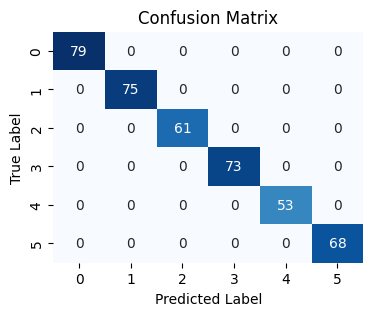

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.3283 - accuracy: 0.9007 - val_loss: 1.5285 - val_accuracy: 0.3560
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 1.2575 - val_accuracy: 0.5217
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0484 - accuracy: 0.9837 - val_loss: 0.7721 - val_accuracy: 0.7677
Epoch 4/10
92

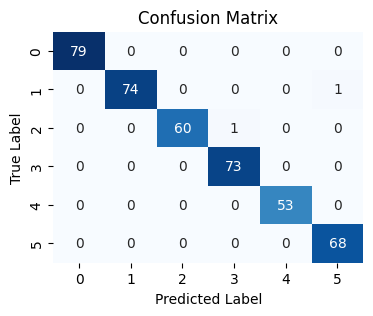

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.99      0.99        75
           2       1.00      0.98      0.99        61
           3       0.99      1.00      0.99        73
           4       1.00      1.00      1.00        53
           5       0.99      1.00      0.99        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409



In [ ]:
CNN(X_s_RS, Y_RS,40,10,15)
CNN(X_s_TR, Y_TR,40,10,15)

##### Drop the features

Let's frop the previously identified least significant features

Random sampled data
         X1        Y1        Z1        X4        Y4        Z4
0  0.607682  0.433367  0.399417  0.419355  0.419036  0.221420
1  0.614540  0.543235  0.416910  0.449223  0.388133  0.293622

Truncated data
         X1        Y1        Z1        X4        Y4        Z4
0  0.521618  0.569672  0.234797  0.452695  0.402200  0.286885
1  0.609484  0.569672  0.239865  0.526946  0.484108  0.308743
Epoch 1/10
92/92 [==============================] - 2s 11ms/step - loss: 0.3298 - accuracy: 0.8854 - val_loss: 1.8459 - val_accuracy: 0.1970
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 2.3643 - val_accuracy: 0.2323
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 2.7100 - val_accuracy: 0.3315
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 2.2896 - val_accuracy: 0.4986
Epoch 5/10
92/92 [=============

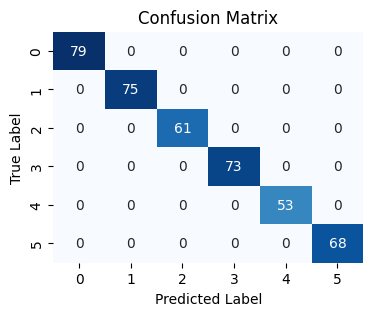

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.4953 - accuracy: 0.8405 - val_loss: 1.7287 - val_accuracy: 0.3288
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 0.2144 - accuracy: 0.9453 - val_loss: 1.9657 - val_accuracy: 0.2582
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.1619 - accuracy: 0.9517 - val_loss: 1.8711 - val_accuracy: 0.3859
Epoch 4/10
92

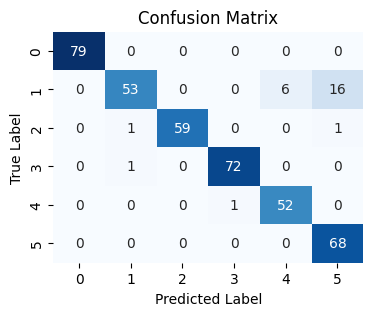

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       0.96      0.71      0.82        75
           2       1.00      0.97      0.98        61
           3       0.99      0.99      0.99        73
           4       0.90      0.98      0.94        53
           5       0.80      1.00      0.89        68

    accuracy                           0.94       409
   macro avg       0.94      0.94      0.94       409
weighted avg       0.94      0.94      0.93       409



In [ ]:
print('Random sampled data')
X_RS_feature_drp= X_s_RS.copy()
X_RS_feature_drp.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
print(X_RS_feature_drp.head(2))

print('\nTruncated data')
X_TR_feature_drp= X_s_TR.copy()
X_TR_feature_drp.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
print(X_TR_feature_drp.head(2))

CNN(X_RS_feature_drp, Y_RS,40,10,6)
CNN(X_TR_feature_drp, Y_TR,40,10,6)


##### Hyper Parameter Optimization

In [ ]:
def M2Opt(frame_size, no_of_features, filters, kernel_size, dense_units, dropout_rate):
    model = keras.Sequential([
        layers.Input(shape=(frame_size, no_of_features)),
        layers.Conv1D(filters, kernel_size, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Conv1D(filters*2, kernel_size, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dropout(dropout_rate),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(6, activation='softmax')
    ])
    return model

def CNNOpt(X, Y, frame_size, stride, no_of_features):
    # Define hyperparameters to tune
    param_grid = {
        'filters': [32, 64],
        'kernel_size': [3, 5],
        'dense_units': [32, 64],
        'dropout_rate': [0.3, 0.5]
    }


    X_frames, Y_frames = framing(X,Y,frame_size,stride)

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_frames, Y_frames, test_size=0.1, random_state=42)

    best_accuracy = 0
    best_params = {}

    # Perform grid search
    for filters in param_grid['filters']:
        for kernel_size in param_grid['kernel_size']:
            for dense_units in param_grid['dense_units']:
                for dropout_rate in param_grid['dropout_rate']:
                    # Create model
                    model = M2Opt(frame_size, no_of_features, filters, kernel_size, dense_units, dropout_rate)

                    # Compile model
                    optimizer = keras.optimizers.Adam(learning_rate=0.001)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model
                    model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

                    # Evaluate model
                    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)

                    # Check if current model is the best
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'filters': filters, 'kernel_size': kernel_size, 'dense_units': dense_units, 'dropout_rate': dropout_rate}

    print("Best parameters found: ", best_params)
    print("Best accuracy found: ", best_accuracy)

    # Re-train model with best parameters
    best_model = M2Opt(frame_size, no_of_features, **best_params)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    best_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    best_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Predict on test set
    Y_pred = np.argmax(best_model.predict(X_test), axis=1)

    # Get confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    plotConfMatrix(conf_matrix)

    # Get classification report
    class_report = classification_report(Y_test, Y_pred)
    print("Classification Report:")
    print(class_report)

Best parameters found:  {'filters': 32, 'kernel_size': 3, 'dense_units': 32, 'dropout_rate': 0.3}
Best accuracy found:  1.0
Epoch 1/10
92/92 [==============================] - 3s 15ms/step - loss: 0.1662 - accuracy: 0.9551 - val_loss: 1.3746 - val_accuracy: 0.7079
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 1.4160 - val_accuracy: 0.4457
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 1.0602 - val_accuracy: 0.5231
Epoch 4/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9117
Epoch 5/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0571 - val_accuracy: 0.9918
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0188 - val_accuracy: 0.9986
Epoch 7/10
92/92 [================

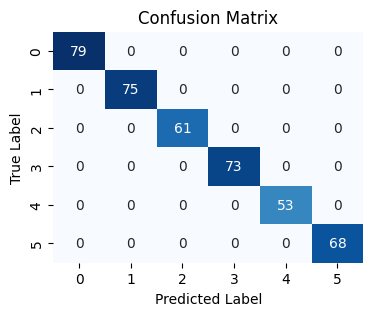

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Best parameters found:  {'filters': 32, 'kernel_size': 3, 'dense_units': 32, 'dropout_rate': 0.3}
Best accuracy found:  0.9975550174713135
Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.3072 - accuracy: 0.8997 - val_loss: 1.5479 - val_accuracy: 0.1766
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0709 - accuracy: 0.9769 - val_loss: 1.5112 - val_accuracy: 0.4117
Epoch 3/10
92/

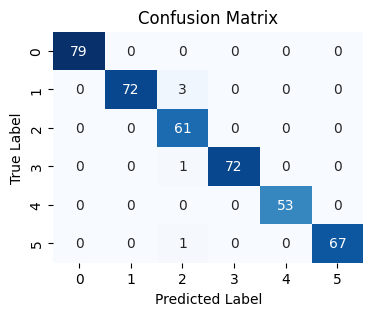

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.96      0.98        75
           2       0.92      1.00      0.96        61
           3       1.00      0.99      0.99        73
           4       1.00      1.00      1.00        53
           5       1.00      0.99      0.99        68

    accuracy                           0.99       409
   macro avg       0.99      0.99      0.99       409
weighted avg       0.99      0.99      0.99       409



In [ ]:
CNNOpt(X_s_RS, Y_RS, 40, 10, 15)
CNNOpt(X_s_TR, Y_TR, 40, 10, 15)
#CNN_Opt(X_s_RS.values, Y_RS.values, 40, 10, 15)
#CNN_Opt(X_s_TR.values, Y_TR.values, 40, 10, 15)

In [ ]:
#models = []f
#models.append(('KNN1',KNeighborsClassifier(n_neighbors=1)))
#models.append(('KNN2',KNeighborsClassifier(n_neighbors=2)))
#models.append(('KNN3',KNeighborsClassifier(n_neighbors=3)))
#models.append(('KNN4',KNeighborsClassifier(n_neighbors=4)))
#models.append(('KNN5',KNeighborsClassifier(n_neighbors=5)))
#models.append(('KNN6',KNeighborsClassifier(n_neighbors=6)))
#models.append(('KNN7',KNeighborsClassifier(n_neighbors=7)))